In [2]:
%pylab inline

import sys
import pandas as pd
import numpy as np
import matplotlib

import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [3]:
print("Python version:\n{}\n".format(sys.version))
print("matplotlib version: {}".format(matplotlib.__version__))
print("pandas version: {}".format(pd.__version__))
print("numpy version: {}".format(np.__version__))
print("seaborn version: {}".format(sns.__version__))

Python version:
3.6.2 |Anaconda, Inc.| (default, Sep 19 2017, 08:03:39) [MSC v.1900 64 bit (AMD64)]

matplotlib version: 2.0.2
pandas version: 0.20.3
numpy version: 1.13.1
seaborn version: 0.9.0


###  DOAJ metadata queried the 10th of March 2019

In [5]:
doaj_data = pd.read_csv('data/doaj_20190310_1030_utf8.csv')
doaj_data.head()

,Journal title,Journal URL,Alternative title,Journal ISSN (print version),Journal EISSN (online version),Publisher,Society or institution,"Platform, host or aggregator",Country of publisher,Journal article processing charges (APCs),...,Does this journal allow unrestricted reuse in compliance with BOAI?,Deposit policy directory,Author holds copyright without restrictions,Copyright information URL,Author holds publishing rights without restrictions,Publishing rights information URL,DOAJ Seal,Tick: Accepted after March 2014,Added on Date,Subjects
0,Revista de Microbiologia,http://www.scielo.br/scielo.php/script_sci_ser...,Journal of the Brazilian Society for Microbiology,0001-3714,1678-9881,Sociedade Brasileira de Microbiologia,NaN,SciELO Brazil,Brazil,No Information,...,NaN,NaN,NaN,NaN,NaN,NaN,No,No,2004-04-23T21:31:00Z,Science: Microbiology
1,Anais da Academia Brasileira de Ciências,http://www.scielo.br/scielo.php?script=sci_ser...,Annals of the Brazilian Academy of Sciences,0001-3765,1678-2690,Academia Brasileira de Ciências,NaN,SciELO Brazil,Brazil,No,...,Yes,NaN,False,NaN,False,NaN,No,Yes,2004-04-23T21:31:00Z,Science
2,ACME,http://riviste.unimi.it/index.php/ACME,NaN,0001-494X,2282-0035,Università degli Studi di Milano,NaN,OJS,Italy,No,...,Yes,NaN,True,http://riviste.unimi.it/index.php/ACME/about/e...,True,http://riviste.unimi.it/index.php/ACME/about/s...,No,Yes,2014-12-22T19:55:58Z,General Works
3,Acta Dermato-Venereologica,http://www.medicaljournals.se/acta,NaN,0001-5555,1651-2057,Society for Publication of Acta Dermato-Venere...,NaN,Society for Publication of Acta Dermato-Venere...,Sweden,Yes,...,Yes,Sherpa/Romeo,False,NaN,False,NaN,No,Yes,2011-11-10T12:31:05Z,Medicine: Dermatology
4,Acta Mycologica,https://pbsociety.org.pl/journals/index.php/am...,NaN,0001-625X,2353-074X,Polish Botanical Society,NaN,OJS,Poland,Yes,...,Yes,Sherpa/Romeo,True,https://pbsociety.org.pl/journals/index.php/am...,True,https://pbsociety.org.pl/journals/index.php/am...,No,Yes,2014-05-29T20:02:32Z,Science: Biology (General)


In [8]:
print("number of journals found: {}".format(doaj_data["Journal title"].nunique()))

number of journals found: 12709


### Get percentages of journals having or not an APC 

In [9]:
pctg = pd.DataFrame(doaj_data["Journal article processing charges (APCs)"].value_counts(normalize=True).reset_index())
pctg.columns=(['has APCs', 'pctg journals'])
pctg

,has APCs,pctg journals
0,No,0.732890
1,Yes,0.262569
2,No Information,0.004542


In [10]:
nr = pd.DataFrame(doaj_data["Journal article processing charges (APCs)"].value_counts(normalize=False).reset_index())
nr.columns=(['has APCs', 'nr journals'])
nr

,has APCs,nr journals
0,No,9359
1,Yes,3353
2,No Information,58


In [11]:
t = pctg.merge(nr, on="has APCs")
t

,has APCs,pctg journals,nr journals
0,No,0.732890,9359
1,Yes,0.262569,3353
2,No Information,0.004542,58


In [12]:
t.style.format({"pctg journals": '{:.2%}'})

,has APCs,pctg journals,nr journals
0,No,73.29%,9359
1,Yes,26.26%,3353
2,No Information,0.45%,58


In [13]:
(t[["nr journals"]].sum())

nr journals    12770
dtype: int64

In [14]:
def set_style():
    # This sets reasonable defaults for font size for
    # a figure that will go in a paper
    sns.set_context("paper")
    
    # Set the font to be serif, rather than sans
    sns.set(font='serif')
    
    # Make the background white, and specify the
    # specific font family
    sns.set_style("white", {
        "font.family": "serif",
        "font.serif": ["Times", "Palatino", "serif"]
    })


set_style()

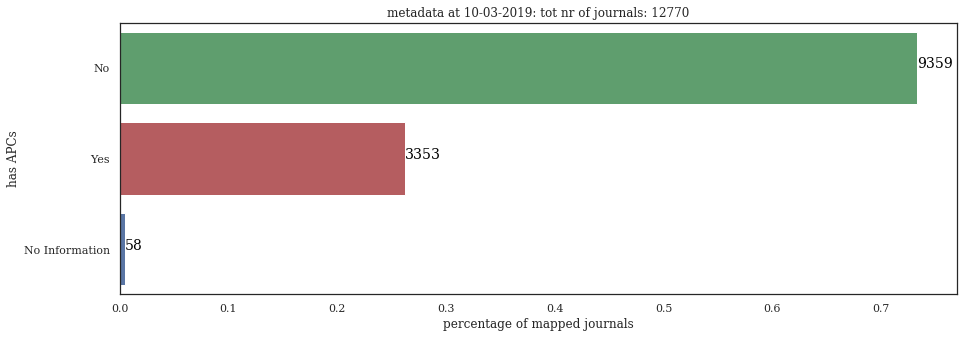

In [17]:
fig, ax= plt.subplots(1,1, figsize=(15,5))

g = sns.barplot(x = "pctg journals", y="has APCs", data=t, palette = sns.color_palette(["#55a868","#c44e52", "#4c72b0"]))
for index, row in t.iterrows():
    g.text(row["pctg journals"],index, row["nr journals"], color='black', ha="left", size=14)

plt.title('metadata at 10-03-2019: tot nr of journals: {}'.format(t[["nr journals"]].sum()[0]))
plt.xlabel('percentage of mapped journals')
plt.savefig('output/Figure_4.pdf', format='pdf', dpi=1000)